## Exercise 2e)

In [11]:
# Autoreload
%load_ext autoreload
%autoreload 1
%aimport utils.neural_network, utils.training, utils.step_methods, utils.cost_functions, utils.activation_functions, utils.utils

# Imports
from utils.neural_network import NeuralNetwork
import numpy as np
import matplotlib.pyplot as plt
from utils.training import TrainingMethod, StochasticGradientDescent, GradientDescent
from utils.step_methods import StepMethod, RMSpropStep, AdamStep
from utils.cost_functions import MSE
from utils.activation_functions import Sigmoid, Identity, ReLU, LeakyReLU
from sklearn.model_selection import KFold, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from utils.utils import generate_dataset, runge, plot_mse_data, analyze_model_learning_rates
from copy import deepcopy

plt.style.use('./utils/_plot_style.mplstyle')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Generate dataset
np.random.seed(124)

n = 300
x, y = generate_dataset(n)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=44)

# Scale dataset
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_mean = y_train.mean()

In [13]:
nodes = list(range(4,41,9))
hidden_layers = [2,4,6]

activation_funcs = [
    ("Sigmoid", Sigmoid()),
    ("ReLU", ReLU()), 
    ("LeakyReLU",LeakyReLU())
]

regularization_types = [
    ("Lasso","L1"), 
    ("Ridge","L2")
]

training_methods = ("SGD", StochasticGradientDescent, (-4, 0))
step_methods = ("ADAM", AdamStep(0, 0.9, 0.999))

In [14]:
n_learning_rates = 9
iterations = 3000
lamb_vals = np.logspace(-3,3,7)
all_mse_data = np.zeros((len(lamb_vals), len(regularization_types), n_learning_rates))
n_layers = 4
n_nodes = 13
activation_func = Sigmoid()

# Analyze mse vs. learning rate and number of nodes for different numbers of hidden layers and activation functions. 
for i, lamb in enumerate(lamb_vals):
    for j,(name,regularization) in enumerate(regularization_types): 
        print("Lambda: ",lamb_vals)
        _,training_method, (min_log_lr,max_log_lr) = training_methods

        learning_rates = list(np.logspace(min_log_lr, max_log_lr, n_learning_rates))

        model = NeuralNetwork(
                network_input_size = 1,
                layer_output_sizes = [n_nodes]*n_layers + [1],
                activation_funcs = [activation_func]*n_layers + [Identity()],
                cost_fun = MSE(regularization = regularization,lambd = lamb)
                )

        np.random.seed(124)
        mse_data = analyze_model_learning_rates(
            model,
            training_method(
                step_method = step_methods[1],
                inputs = x_train_scaled,
                targets = y_train - y_mean,
                test_inputs = x_test_scaled,
                test_targets = y_test - y_mean,
            ),
            learning_rates, 
            iterations,
        )
        print(".")
        all_mse_data[i][j] = mse_data

Lambda:  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
.
Lambda:  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
.
Lambda:  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
.
Lambda:  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
.
Lambda:  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
.
Lambda:  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
.
Lambda:  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
.
Lambda:  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
.
Lambda:  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
.
Lambda:  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
.
Lambda:  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
.
Lambda:  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
.
Lambda:  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
.
Lambda:  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
.


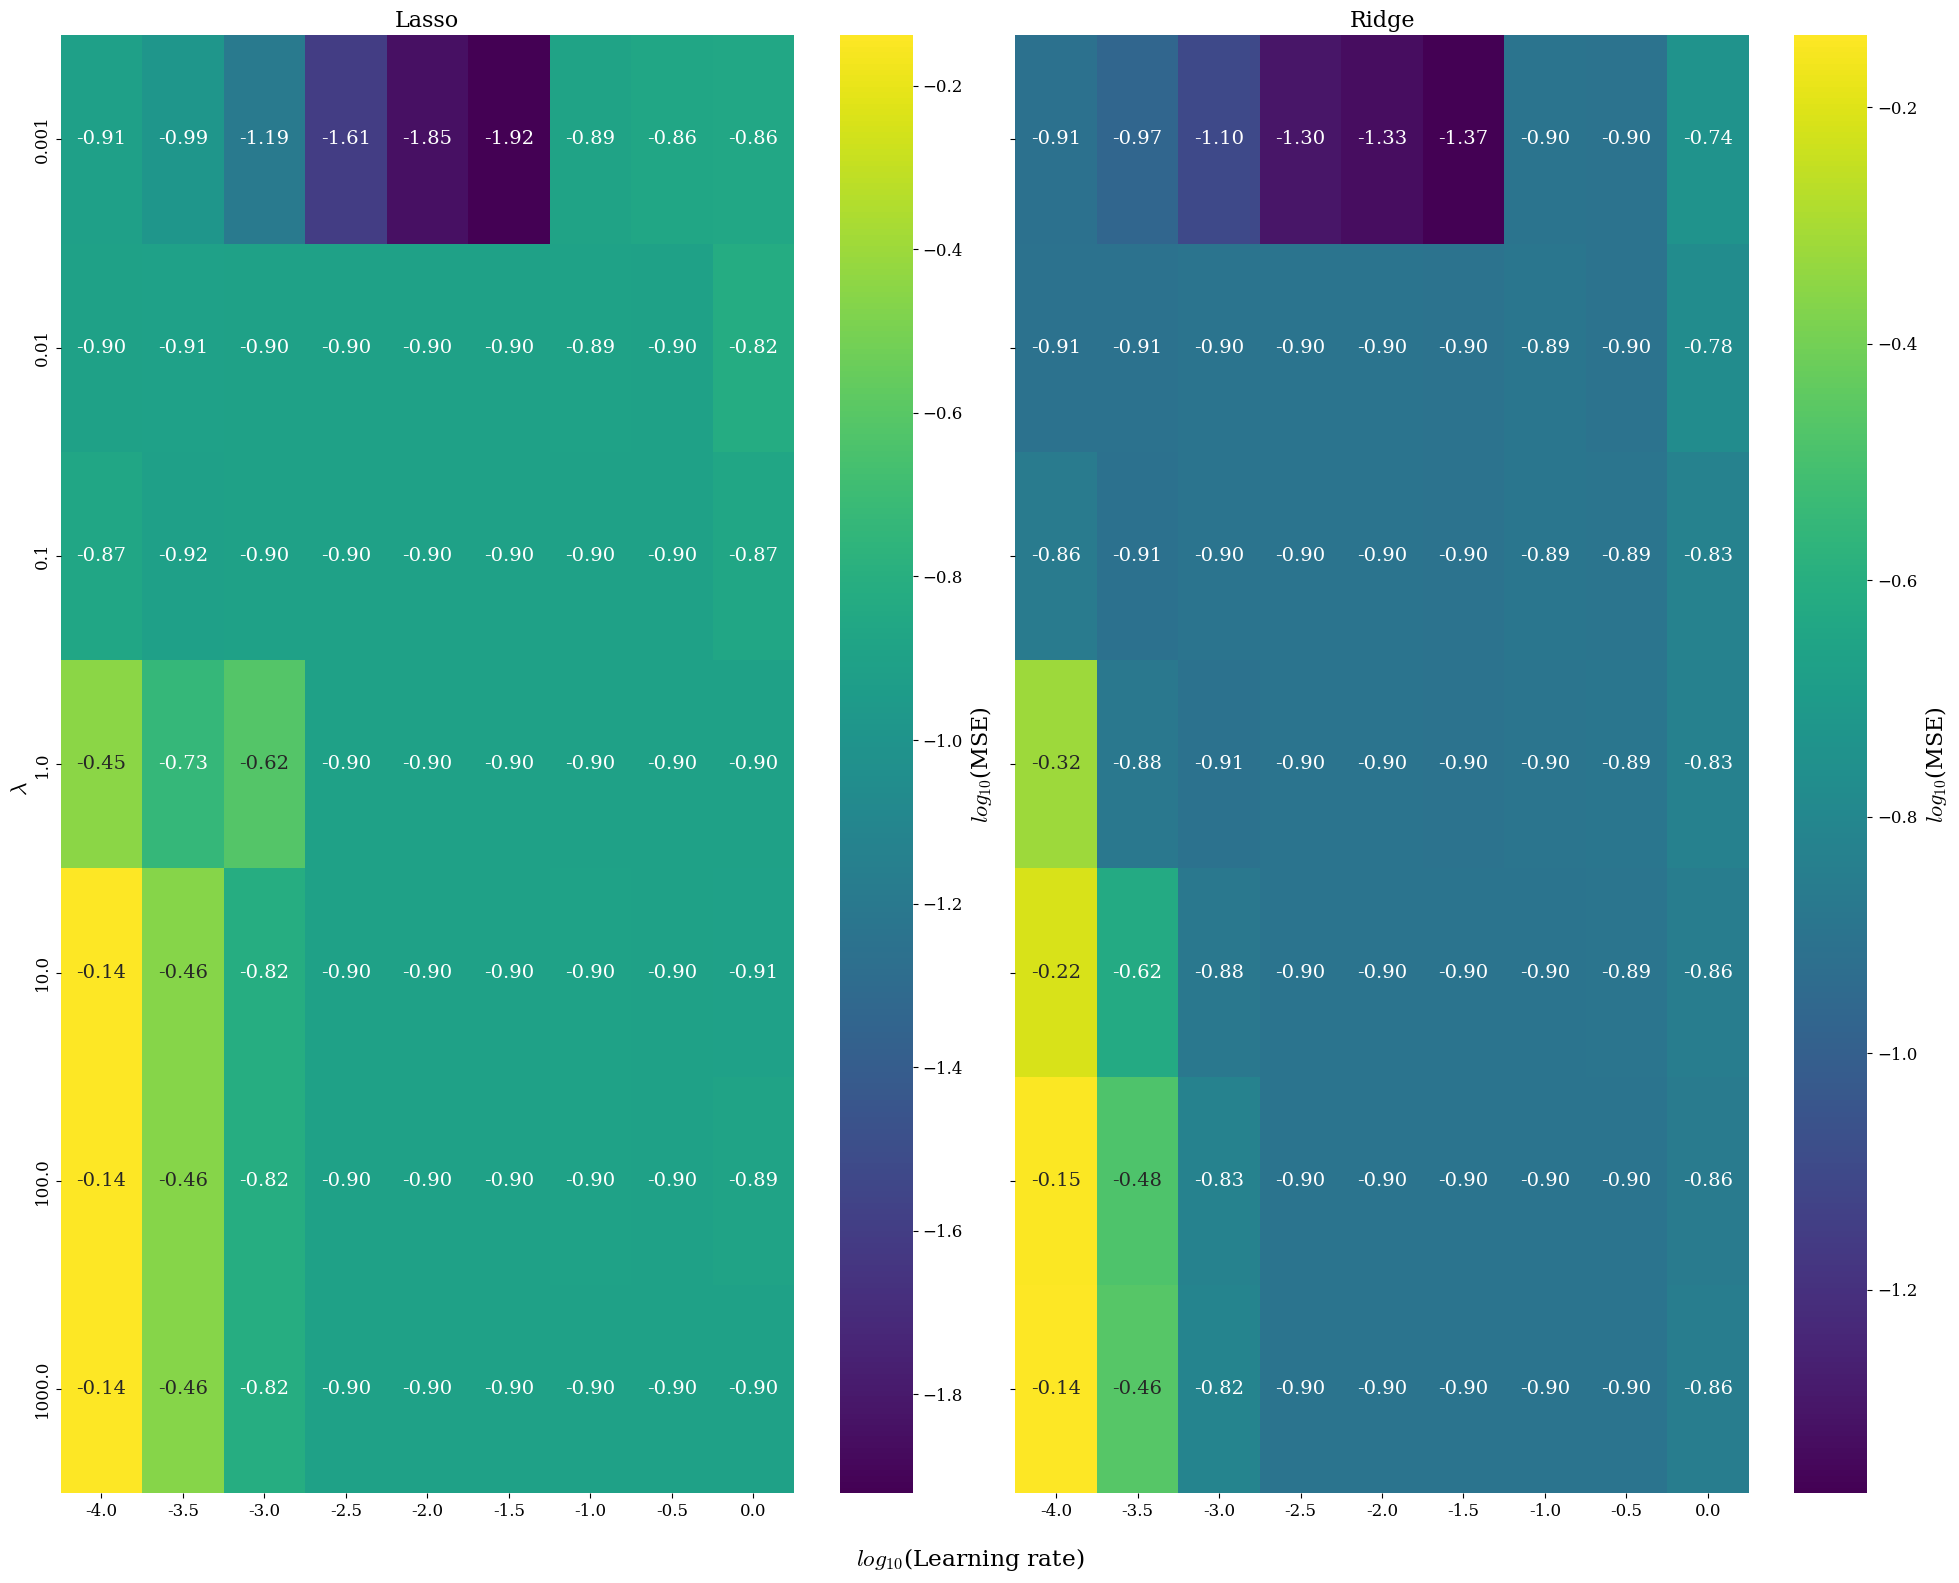

In [15]:
# Plot MSE vs. learning rates for each model

import seaborn as sns

fig, axes = plt.subplots(1, len(regularization_types), figsize=(20, 16), sharey=True)
for i,(name,regularization_type) in enumerate(regularization_types):
    mse_data = all_mse_data[:,i,:]
    sns.heatmap(
        np.log10(np.array(mse_data)),  
        ax = axes[i],
        fmt=".2f",   
        annot=True,
        cmap="viridis", 
        xticklabels=np.log10(np.array(learning_rates)),
        yticklabels=lamb_vals,cbar_kws={"label": r"$log_{10}$(MSE)"}
        )
    axes[i].set_title(f"{name}")

fig.supxlabel(r"$log_{10}$(Learning rate)")
fig.supylabel(r"$\lambda$")
plt.savefig("../figs/mse_vs_lr_nodes.pdf")
plt.show()